In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# P圖小工具

In [3]:
def show_img(img):  
    copy_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(copy_img)
    plt.show()

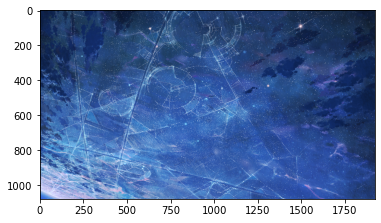

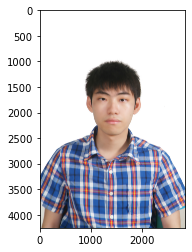

In [4]:
background = cv2.imread('C:\\Users\\USER\\Pictures\\Wallpaper\\570de09c3929f.jpg')
charater = cv2.imread('C:\\Users\\USER\\python_file\\105.5.14-1.jpg')

show_img(background)
show_img(charater)

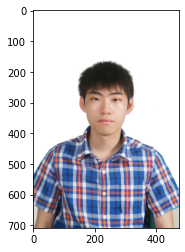

In [5]:
#縮小角色圖像
h,w,c = charater.shape
re_char = cv2.resize(charater, (int(w/6), int(h/6)), interpolation=cv2.INTER_AREA)

show_img(re_char)

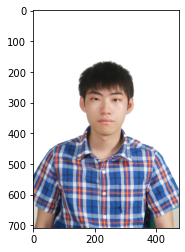

In [6]:
# 油漆桶:把背景過濾成白色
copy_char = re_char.copy()

seed = (10,10)
loDiff = (60,60,60)
upDiff = (40,40,40)
color = (255,255,255)

h,w = copy_char.shape[:2]
mask = np.zeros([h+2,w+2],dtype=np.uint8)
cv2.floodFill(copy_char, mask, seed, color, loDiff, upDiff, cv2.FLOODFILL_FIXED_RANGE) 

show_img(copy_char)

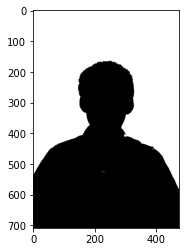

In [7]:
# 二值化(取得遮罩)
gray_chr = cv2.cvtColor(copy_char,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray_chr, 254, 255, cv2.THRESH_BINARY)

show_img(mask)


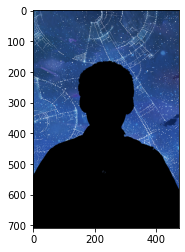

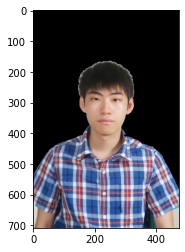

In [8]:
# 框選出背景，將人像遮罩放入至框選背景中
h,w = mask.shape
y = 100
x = 750

roi = background[y:y+h,x:x+w]
bg = cv2.bitwise_and(roi, roi, mask = mask) #bitwise_and: 遇黑則黑，遇白則保持原樣

# 反向操作，得到有色彩的人像
mask_inv = cv2.bitwise_not(mask)
fg = cv2.bitwise_and(re_char, re_char, mask = mask_inv) #bitwise_and: 遇黑則黑，遇白則保持原樣


show_img(bg)
show_img(fg)

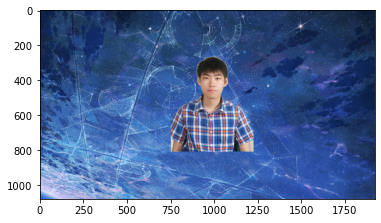

In [9]:
# 將背景與人像結合，放至原本的背景圖像位置
dst = cv2.add(bg,fg)
background[y:y+h, x:x+w] = dst

show_img(background)